# How well can an agent-based model represent a mutating pathogen among a population?
✅ Put your name here.

“Agent-based model of a mutating pathogen. Inspired by the work we've already done in this class. Could be as complex as the group wanted.”
random wrtie anything other than actual code if needed

I made change on person class, so it does not go out of the env. The default of our envrionment is 100x100 now. If we want the envrionment size to be different, we have to create person class that has different xmax and ymax value.

Virus class now has : def get_transmission_rate(self)

Code

# Person

In [9]:
import random

class Person:
    def __init__(self, x, y, infected=False, virus_type=None, immune=False,xmax=100,ymax=100):
        self.x = x 
        self.y = y  
        self.infected = infected 
        self.virus_type = virus_type  
        self.alive = True  
        self.immune = immune 
        self.days_infected = 0  
        self.xmax = xmax
        self.ymax = ymax
    def move(self):
        if not self.infected:
            dx, dy = random.choice([(0,1), (0,-1), (1,0), (-1,0)])
            new_x = self.x + random.randint(1, 6) * dx
            new_y = self.y + random.randint(1, 6) * dy
            
            if (new_x > self.xmax):
                new_x = self.xmax
            if (new_x<0):
                new_x=0
            if (new_y > self.ymax):
                new_y = self.ymax
            if (new_y<0):
                new_y=0
            
        else:
            dx, dy = random.choice([(0,1), (0,-1), (1,0), (-1,0)])
            new_x = self.x + random.randint(1, 2) * dx
            new_y = self.y + random.randint(1, 2) * dy
            if (new_x > self.xmax):
                new_x = self.xmax
            if (new_x<0):
                new_x=0
            if (new_y > self.ymax):
                new_y = self.ymax
            if (new_y<0):
                new_y=0
                
        self.x = new_x
        self.y = new_y

    def infect(self, virus_type):
        self.infected = True
        self.virus_type = virus_type
    
    def recover(self):
        self.infected = False
        self.virus_type = None
        self.immune = True
    
    def die(self):
        self.alive = False
    
    def update(self, virus):
        if self.infected:
            self.days_infected += 1
            if self.days_infected >= virus.get_recovery_time():
                self.recover()
            elif random.random() < virus.get_death_rate():
                self.die()
            else:
                virus.update(self)
    
    def is_immune(self):
        return self.immune
    
    def check_direct_contact(self, env, virus_type):
        adjacent_people = env.get_adjacent_people(self.x, self.y)
        for person in adjacent_people:
            if person.infected and not self.is_immune():
                self.infect(virus_type)
                break

person has informations:
location (x and y coordinates)
infected or not
virus
dead or alive
immune or not
days of infected time
person will move randomly 1~6 cells when not infected, and if it is out of the environment, it will not <- did not code yet

when infected, person can - die - recover

if a person makes a direct contact with an infected person and not immune, infected

# Virus

In [10]:
class Virus:
    def __init__(self, recovery_days, mortality_rate, transmission_rate,infection_distance):
        self.recovery_days = recovery_days
        self.mortality_rate = mortality_rate
        self.transmission_rate = transmission_rate
        self.infection_distance = infection_distance
    
    def get_recovery_time(self):
        return self.recovery_time
    
    def get_death_rate(self):
        return self.death_rate
    
    def get_transmission_rate(self):
        return self.transmission_rate
    
    def update(self, person):
        pass  

# Environment

In [11]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import clear_output

class Environment:
    def __init__(self, xmax=100, ymax=100):
        self.xmax = xmax
        self.ymax = ymax
        self.people = []
        self.virus = None
        self.dead_count = 0
        self.infect_count = 0
        self.environ = np.zeros((self.xmax,self.ymax,3))
        self.environ[:,:,0] = 0.8
        self.environ[:,:,1] = 0.8
        self.environ[:,:,2] = 0.8
    
    def add_person(self, person):
        self.people.append(person)
    
    def add_virus(self, virus):
        self.virus = virus
        
    def get_virus(self):
        return self.virus
    def get_distance(self, person1, person2):
        
        return np.sqrt((person1.x - person2.x)**2 + (person1.y - person2.y)**2)
        
    def simulate(self,times):
        for day in range(times):
            clear_output(wait=True)
            plt.figure(figsize=(6, 6))
            plt.imshow(self.environ)
            ax = plt.gca()
            for i, person in enumerate(self.people):
                person.move()
                
                if not person.immune:
                    for j, other_person in enumerate(self.people):
                        if i != j and other_person.infected:
                            distance = self.get_distance(person, other_person)
                            if distance < self.virus.infection_distance:
                                if random.random() < self.virus.transmission_rate:
                                    if not person.infected:
                                        person.infected = True
                                        self.infect_count += 1
                            
                if person.infected:
                    if random.random() < self.virus.mortality_rate:
                        self.dead_count += 1
                        self.people.pop(i)
                    elif person.days_infected >= self.virus.recovery_days:
                        person.infected = False
                        person.immune = True
                    else:
                        person.days_infected += 1
                        
                if person.infected:
                    color = 'red'
                elif not person.alive:
                    color = 'grey'
                elif person.immune:
                    color = "green"
                else:
                    color = 'blue'
                    
                ax.scatter(person.x, person.y, c=color)
                               
            plt.xlim(0, self.xmax)
            plt.ylim(0, self.ymax)
            plt.show()
            time.sleep(0.01)

    def get_death(self):
        return self.dead_count
    def get_infected(self):
        return self.infect_count


# Simulation

In [12]:
env = Environment()

vir = Virus(10, 0.01, 0.5,10)
env.add_virus(vir)


for i in range(100):
    x, y = random.randint(0, 99), random.randint(0, 99)
    person = Person(x, y)
    env.add_person(person)

infected_people = random.sample(env.people, 10)
for person in infected_people:
    person.infected = True

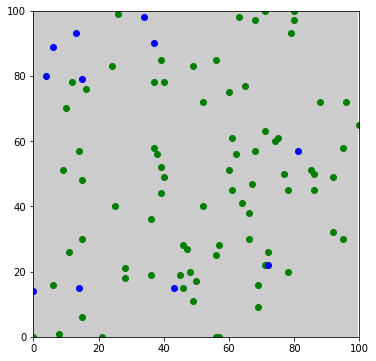

9
79


In [13]:
env.simulate(50)
print(env.get_death())
print(env.get_infected())


0.4094863616474591